# Traffic Violations in Maryland County

## Group 11 Team Members:
## Attestation
#### All project team member contributed equally and meaningfully to the project and have completed knowledge on any part of it.
## Contribution
##### -- Yucong Hu: Design schema; create dimentional tables vehicle; date; hour; bueinss questions 2 and 3 and data visualization; 
##### -- Yuyang Zhao: Create dimentional tables consequence; location; bueinss questions 2 and 3 and data visualization
##### -- Yichen Li: Create dimentional tables law; cause; Bueinss questions 1 and data visualization
##### -- Shengqi Zhou: Setup database; Create dimentional tables; personal information; bueinss questions 1 and data visualization

## Identify our dataset and describe the reason we choose the dataset

### Select Data: Identify Traffic Violations in Maryland County
We decided to use the dateset of Traffic Violations in Maryland County dataset. This datasets provides details on information of traffice violations happened in Maryland county with 35 columns about vehicle, driver's information, law-related information, possible causes of violation and consequences of violations.
This data set contains all events of traffic violations from 2012 to 2018 in Maryland Couty. It has about 1.04 million records. The data type include date, number, boolean and text.

### Reason to choose our dataset: why this data
For minor violations, there are defective or improper vehicle equipment, seat belt and child-restraint safety violations, and exceeding speed limit, insurance or registration. For serious violations, it involves willful disregard of public safety, death or serious bodily injury, or damage to property. By and large, it's a very useful dataset which includes thorough information. D.C. has close geographical connection with Maryland, so D.C. residents, like us, care about the situation of traffic viiolation in our neighborhood. We would like to explore phenomenon and elements related to traffic violation and accidents. The data source is https://www.kaggle.com/rounak041993/traffic-violations-in-maryland-county.

### Column description
1. accident : If traffic violation involved an accident.
2. agency : Agency issuing the traffic violation. (Example: MCP is Montgomery County Police)
3. alcohol : If the traffic violation included an alcohol related
4. arrest_type : Type of Arrest (A = Marked, B = Unmarked, etc.)
5. article : Article of State Law. (TA = Transportation Article, MR = Maryland Rules)
6. belts : If traffic violation involved a seat belt violation.
7. charge : Numeric code for the specific charge.
8. color : Color of the vehicle.
9. commercial_icense : If driver holds a Commercial Drivers License.
10. Commercial Vehicle : If the vehicle committing the traffic violation is a commercial vehicle.
11. Contributed To Accident : If the traffic violation was a contributing factor in an accident.
12. Date Of Stop : Date of the traffic violation.
13. Description : Text description of the specific charge.
14. DL State : State issuing the Driver’s License.
15. Driver City : City of the driver’s home address.
16. Driver State : State of the driver’s home address.
17. Fatal : If traffic violation involved a fatality.
18. Gender : Gender of the driver (F = Female, M = Male)
19. Geolocation : Geo-coded location information.
20. HAZMAT : If the traffic violation involved hazardous materials.
21. Latitude : Latitude location of the traffic violation.
22. Location : Location of the violation, usually an address or intersection.
23. Longitude : Longitude location of the traffic violation.
24. Make : Manufacturer of the vehicle (Examples: Ford, Chevy, Honda, Toyota, etc.)
25. Model : Model of the vehicle.
26. Personal Injury : If traffic violation involved Personal Injury.
27. Property Damage : If traffic violation involved Property Damage.
28. Race : Race of the driver. (Example: Asian, Black, White, Other, etc.)
29. State : State issuing the vehicle registration.
30. SubAgency : Court code representing the district of assignment of the officer. R15 = 1st district, Rockville B15 = 2nd district, Bethesda SS15 = 3rd district, Silver Spring WG15 = 4th district, Wheaton G15 = 5th district, Germantown M15 = 6th district, Gaithersburg / Montgomery Village HQ15 = Headquarters and Special Operations
31. Time Of Stop : Time of the traffic violation.
32. VehicleType : Type of vehicle (Examples: Automobile, Station Wagon, Heavy Duty Truck, etc.)
33. Violation Type : Violation type. (Examples: Warning, Citation, SERO)
34. Work Zone : If the traffic violation was in a work zone.
35. Year : Year vehicle was made.         

### Wrangling the Dataset
#### 1) Data Acquisition
##### We uploaded our dateset onto AWS S3 and using !wget to acquire dateset into AWS jupyter notebook. The dataset is loaded into a database in a star schema with several dimension tables. At every step of the work we made effort to ensure that all data is loaded correctly.

#### 2) Data Cleaning
##### -Make sure each column in tables are transactional data by changing composed values into atomic value
##### -Through csvstat, we observed our several columns contain null values, and we have two methods to deal with them. We set default values for some of them, and also remove null values in latitude and longitude when making a map analysis.
##### -After had a breif glance at our dateset, we found column accident has all false values, which is not really usefull. So we decided to remove this column

## Analytical questions I want to answer with the data
#### 1) If a invester wants to establish a hospital in the area we are researching, where is the most proper location for the hospital to be used efficiently?
#### 2) If department of transportation wants to decrease personal injury and number of violations in this area, which are the obvious streets the governemnt should pay more attention to and what actions it can take?
#### 3) If local community and non-profit organizations such as American Red-cross want to arrange some volunteers during peak hour of traffic violations, what kind of recourses they should distribute? 
#### 4) If companies want to purchase vehical for commercail purpose, what considerations should be taken into account? 

## Concerns with the dataset and changes we expect to overcome
##### Since we only have the car information involving violation, but not  the overall information on the total number of comsumption of every model and manufacturer. When we are tring to compare which car manufacturer is most likely to involve personal_injury, we would not be able to get a fair conclusion. So we can not say which car manufacturer produces the safer car if there is no proportion on calculation due to survivorship bias.
##### We found out that there are many input mistakes on values of column make. We used the case statement to fix this problem. 
##### We have 1.04 million records, which would slow down our data analysis process. We would like to try other more advanced tools such as XSV, spark or other big data tools to speed up our analysis process.

## Set up

In [1]:
## The ipython-sql library is loaded using the %load_ext iPython extension syntax and is pointed to the connection object aa
%load_ext sql

In [2]:
## The ipython-sql library is loaded using the %load_ext iPython extension syntax and is pointed to the connection object 
!dropdb -U student week12

dropdb: database removal failed: ERROR:  database "week12" is being accessed by other users
DETAIL:  There are 2 other sessions using the database.


In [3]:
## create a new database for user student and nameit week12
!createdb -U student week12

createdb: database creation failed: ERROR:  database "week12" already exists


In [2]:
## connect to the database. 
%sql postgresql://student@/week12

'Connected: student@week12'

In [5]:
## upload the Traffic Violation dataset 
!wget https://shengqizhou.s3.amazonaws.com/Traffic_Violations.csv

--2019-12-01 22:21:01--  https://shengqizhou.s3.amazonaws.com/Traffic_Violations.csv
Resolving shengqizhou.s3.amazonaws.com (shengqizhou.s3.amazonaws.com)... 52.216.93.195
Connecting to shengqizhou.s3.amazonaws.com (shengqizhou.s3.amazonaws.com)|52.216.93.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 469434696 (448M) [text/csv]
Saving to: ‘Traffic_Violations.csv’

Traffic_Violations. 100%[===================>] 447.69M  51.9MB/s    in 9.0s    

2019-12-01 22:21:10 (49.9 MB/s) - ‘Traffic_Violations.csv’ saved [469434696/469434696]



In [6]:
# change the name of the file
!mv Traffic_Violations.csv violations.csv

In [56]:
## use csvcut to find the heading (attribute labels) of the file
!csvcut -n violations.csv

  1: Date Of Stop
  2: Time Of Stop
  3: Agency
  4: SubAgency
  5: Description
  6: Location
  7: Latitude
  8: Longitude
  9: Accident
 10: Belts
 11: Personal Injury
 12: Property Damage
 13: Fatal
 14: Commercial License
 15: HAZMAT
 16: Commercial Vehicle
 17: Alcohol
 18: Work Zone
 19: State
 20: VehicleType
 21: Year
 22: Make
 23: Model
 24: Color
 25: Violation Type
 26: Charge
 27: Article
 28: Contributed To Accident
 29: Race
 30: Gender
 31: Driver City
 32: Driver State
 33: DL State
 34: Arrest Type
 35: Geolocation


In [9]:
## check the number of lines in the file
!wc -l violations.csv

1293488 violations.csv


## Create Table and Import

In [9]:
## let's first have a feeling for the data values in the 9 fields
!head -n 5 violations.csv

Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION,8804 FLOWER AVE,,,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2008,FORD,4S,BLACK,Citation,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,
08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS,WISCONSIN AVE@ ELM ST,38.981725,-77.0927566666667,No,No,No,No,No,No,No,No,No,No,VA,02 - Automobile,2001,TOYOTA,COROLLA,GREEN,Citation,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.9817

In [10]:
## we won't be sure of our above conclusions on the data unless we examine a good sample of it. Let's do that for first 10000 of the records
!head -n 10000 violations.csv | csvstat

  1. "Date Of Stop"

	Type of data:          Date
	Contains null values:  False
	Unique values:         898
	Smallest value:        2012-01-01
	Largest value:         2017-09-19
	Most common values:    2016-12-02 (776x)
	                       2016-11-23 (694x)
	                       2016-12-01 (685x)
	                       2016-11-26 (676x)
	                       2016-11-24 (585x)

  2. "Time Of Stop"

	Type of data:          TimeDelta
	Contains null values:  False
	Unique values:         1333
	Most common values:    22:39:00 (37x)
	                       0:39:00 (36x)
	                       1:06:00 (33x)
	                       23:01:00 (31x)
	                       0:12:00 (31x)

  3. "Agency"

	Type of data:          Text
	Contains null values:  False
	Unique values:         1
	Longest value:         3 characters
	Most common values:    MCP (9995x)

  4. "SubAgency"

	Type of data:          Text
	Contains null values:  False
	Unique values:         7
	Longest value:         47 

In [11]:
!csvcut -c33 violations.csv | csvstat

  1. "DL State"

	Type of data:          Text
	Contains null values:  True (excluded from calculations)
	Unique values:         71
	Longest value:         2 characters
	Most common values:    MD (1123914x)
	                       VA (42858x)
	                       DC (41768x)
	                       XX (17732x)
	                       PA (8091x)

Row count: 1292399


In [3]:
%%sql
DROP TABLE IF EXISTS violations;

CREATE TABLE violations (
     Date_Of_Stop     DATE      NOT NULL,
     Time_Of_Stop     TIME      NOT NULL,
     Agency           TEXT      NOT NULL,
     SubAgency        TEXT,
     Description      TEXT,
     Location         TEXT,
     Latitude         NUMERIC,
     Longitude        NUMERIC,
     Accident         BOOLEAN      NOT NULL,
     Belts            BOOLEAN      NOT NULL,
     Personal_Injury  BOOLEAN      NOT NULL,
     Property_Damage  BOOLEAN      NOT NULL,
     Fatal            BOOLEAN      NOT NULL,       
     Commercial_License BOOLEAN   NOT NULL,
     HAZMAT           BOOLEAN   NOT NULL,
     Commercial_Vehicle BOOLEAN   NOT NULL,
     Alcohol           BOOLEAN   NOT NULL,
     Work_Zone         BOOLEAN   NOT NULL,
     State             TEXT,
     VehicleType       TEXT   NOT NULL,
     Year              NUMERIC,
     Make              TEXT,
     Model             TEXT,
     Color             TEXT,
     Violation_Type    TEXT  NOT NULL,
     Charge            TEXT  NOT NULL,
     Article           TEXT,
     Contributed_To_Accident BOOLEAN   NOT NULL,
     Race              TEXT  NOT NULL,
     Gender            TEXT  NOT NULL,
     Driver_City    TEXT,
     Driver_State   TEXT,
     DL_State       TEXT,
     Arrest_Type    TEXT  NOT NULL,
     Geolocation    TEXT
);

 * postgresql://student@/week12
Done.
Done.


[]

In [4]:
!cp violations.csv /tmp/violations.csv

In [5]:
%%sql
COPY violations FROM '/tmp/violations.csv'
CSV
HEADER;

 * postgresql://student@/week12
1292399 rows affected.


[]

# create primary key --id

In [10]:
%%sql
ALTER TABLE violations
 ADD COLUMN id SERIAL PRIMARY KEY

 * postgresql://student@/week12
Done.


[]

In [11]:
%%sql
SELECT COUNT(*) FROM violations;

 * postgresql://student@/week12
1 rows affected.


count
1292399


In [10]:
!wc -l violations.csv

1293488 violations.csv


In [12]:
%%sql
UPDATE violations SET year = 9999 WHERE year IS null;
UPDATE violations SET make = 'NA' WHERE make IS null;
UPDATE violations SET driver_city = 'NA' WHERE driver_city IS null;
UPDATE violations SET article = 'NA' WHERE article IS null;
UPDATE violations SET dl_state = 'NA' WHERE dl_state IS null;
UPDATE violations SET geolocation = 'NA' WHERE geolocation IS null;
UPDATE violations SET model = 'NA' WHERE model IS null;
UPDATE violations SET description = 'NA' WHERE description IS null;
UPDATE violations SET color = 'NA' WHERE color IS null;

 * postgresql://student@/week12
8074 rows affected.
1 rows affected.
97 rows affected.
65169 rows affected.
929 rows affected.
95354 rows affected.
33 rows affected.
8 rows affected.
1746 rows affected.


[]

### Creating the time dimension table by combine data_of_stop and time_of_stop
#### Link data_of_stop dimension table to the violations fact table

In [13]:
%%sql
SELECT TO_CHAR(date_of_stop, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(date_of_stop, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(date_of_stop, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(date_of_stop, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(date_of_stop, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(date_of_stop, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(date_of_stop, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(date_of_stop, 'D') AS INTEGER) IN (1,7)
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(date_of_stop, 'D') AS INTEGER) NOT IN (1,7)
        THEN TRUE 
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(date_of_stop, 'Q') AS INTEGER) AS quarter_of_year
FROM violations
LIMIT 5;

 * postgresql://student@/week12
5 rows affected.


day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,is_weekend,is_weekday,quarter_of_year
2017-08-29,2017,August,8,29,Tuesday,3,False,True,3
2014-12-01,2014,December,12,1,Monday,2,False,True,4
2017-08-29,2017,August,8,29,Tuesday,3,False,True,3
2013-10-08,2013,October,10,8,Tuesday,3,False,True,4
2014-02-14,2014,February,2,14,Friday,6,False,True,1


creating dimension table date

In [14]:

%%sql
DROP TABLE IF EXISTS date;

CREATE TABLE date (
    key SERIAL PRIMARY KEY,
    day CHAR(10),
    year INTEGER,
    month_of_year_str VARCHAR(12),
    month_of_year INTEGER,
    day_of_month INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    is_weekend BOOLEAN,
    is_weekday BOOLEAN,
    quarter_of_year INTEGER
);

 * postgresql://student@/week12
Done.
Done.


[]

insert value in to date table

In [15]:

%%sql
INSERT INTO date (day, year, month_of_year_str, month_of_year, day_of_month, 
                  day_of_week_str, day_of_week, is_weekend, is_weekday, 
                  quarter_of_year)
SELECT TO_CHAR(date_of_stop, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(date_of_stop, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(date_of_stop, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(date_of_stop, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(date_of_stop, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(date_of_stop, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(date_of_stop, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(date_of_stop, 'D') AS INTEGER) IN (1,7)
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(date_of_stop, 'D') AS INTEGER) NOT IN (1,7)
        THEN TRUE 
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(date_of_stop, 'Q') AS INTEGER) AS quarter_of_year
FROM violations

 * postgresql://student@/week12
1292399 rows affected.


[]

In [16]:
%%sql
ALTER TABLE violations
ADD COLUMN date_key INTEGER,
ADD CONSTRAINT fk_date
    FOREIGN KEY (date_key)
    REFERENCES date (key);

 * postgresql://student@/week12
Done.


[]

In [17]:
%%sql
UPDATE violations
SET date_key = date.key
FROM date
WHERE violations.id = date.key;

 * postgresql://student@/week12
1292399 rows affected.


[]

### Creating the date dimension table and hour dimension table
#### Link hour dimension table to the violations fact table

In [18]:
%%sql
SELECT TO_CHAR(time_of_stop, 'hh24:MI:ss') AS time,
    CAST(TO_CHAR(time_of_stop, 'hh24') AS INTEGER) AS hour,
    CAST(TO_CHAR(time_of_stop, 'MI') AS INTEGER) AS minute
FROM violations
LIMIT 5;

 * postgresql://student@/week12
5 rows affected.


time,hour,minute
10:19:00,10,19
12:52:00,12,52
09:22:00,9,22
13:23:00,13,23
20:10:00,20,10


creating dimension table time_of_stop

In [19]:
%%sql
DROP TABLE IF EXISTS hour;

CREATE TABLE hour (
    key SERIAL PRIMARY KEY,
    time CHAR(10),
    hour INTEGER,
    minute INTEGER
);

 * postgresql://student@/week12
Done.
Done.


[]

insert values into time_of_stop table

In [20]:
%%sql
INSERT INTO hour (time, hour, minute)
SELECT TO_CHAR(time_of_stop, 'hh24:MI:ss') AS time,
    CAST(TO_CHAR(time_of_stop, 'hh24') AS INTEGER) AS hour,
    CAST(TO_CHAR(time_of_stop, 'MI') AS INTEGER) AS minute
FROM violations

 * postgresql://student@/week12
1292399 rows affected.


[]

In [21]:
%%sql
ALTER TABLE violations
ADD COLUMN hour_key INTEGER,
ADD CONSTRAINT fk_hour
    FOREIGN KEY (hour_key)
    REFERENCES hour (key);

 * postgresql://student@/week12
Done.


[]

In [22]:
%%sql
UPDATE violations
SET hour_key = hour.key
FROM hour
WHERE violations.id = hour.key;

 * postgresql://student@/week12
1292399 rows affected.


[]

### Creating the vehicle dimension table
#### Link vehicle dimension table to the violations fact table

In [23]:
%%sql
SELECT color, commercial_vehicle,make, model, state, vehicletype, year
FROM violations
LIMIT 5;

 * postgresql://student@/week12
5 rows affected.


color,commercial_vehicle,make,model,state,vehicletype,year
GREEN,False,TOYOTA,COROLLA,VA,02 - Automobile,2001
SILVER,False,HONDA,ACCORD,MD,02 - Automobile,2001
WHITE,False,DODG,DAKOTA,MD,02 - Automobile,1998
BLACK,False,FORD,PICKUP,MD,02 - Automobile,1993
BLACK,False,CADI,STS,MD,02 - Automobile,2005


In [24]:
%%sql
DROP TABLE IF EXISTS vehicle;

CREATE TABLE vehicle (
    key SERIAL PRIMARY KEY,
    color CHAR(11),
    commericial_vehicle BOOLEAN,
    make CHAR(20),
    model CHAR(25),
    state CHAR(2),
    vehicletype CHAR(25),
    year INTEGER
);

 * postgresql://student@/week12
Done.
Done.


[]

In [ ]:
## From the above, the total number of characters for make number was 15. Let's make sure. 
!csvcut -c22 violations.csv | csvstat

In [ ]:
## From the above, the total number of characters for vehicletype number was 15. Let's make sure. 
!csvcut -c20 violations.csv | csvstat

In [25]:
%%sql
INSERT INTO vehicle (color,commericial_vehicle,make, model,state, vehicletype, year)
SELECT color,commercial_vehicle,make, model,state, vehicletype, year
FROM violations;

 * postgresql://student@/week12
1292399 rows affected.


[]

In [26]:
%%sql
ALTER TABLE violations
ADD COLUMN vehicle_key INTEGER,
ADD CONSTRAINT fk_vehicle
    FOREIGN KEY (vehicle_key)
    REFERENCES vehicle (key);

 * postgresql://student@/week12
Done.


[]

In [27]:
%%sql
UPDATE violations
SET vehicle_key = vehicle.key
FROM vehicle
WHERE violations.id = vehicle.key;

 * postgresql://student@/week12
1292399 rows affected.


[]

### Creating the personal information table
#### Link personal information table to the violations fact table

In [28]:
%%sql
SELECT commercial_license, dl_state, driver_state, driver_city, gender, race
FROM violations
LIMIT 5;

 * postgresql://student@/week12
5 rows affected.


commercial_license,dl_state,driver_state,driver_city,gender,race
False,WV,MD,POINT OF ROCK,M,WHITE
False,VA,VA,ARLINGTON,M,HISPANIC
False,MD,MD,SILVER SPRING,F,WHITE
False,MD,MD,DERWOOD,M,WHITE
False,VA,VA,FAIRFAX STATION,F,WHITE


In [29]:
%%sql
DROP TABLE IF EXISTS pinformation;

CREATE TABLE pinformation (
    key SERIAL PRIMARY KEY,
    commercial_license BOOLEAN, 
    dl_state CHAR(2), 
    driver_state CHAR(2), 
    driver_city TEXT, 
    gender CHAR(1), 
    race CHAR(15)
);

 * postgresql://student@/week12
Done.
Done.


[]

In [10]:
!csvcut -c33 violations.csv | csvstat

  1. "DL State"

	Type of data:          Text
	Contains null values:  True (excluded from calculations)
	Unique values:         71
	Longest value:         2 characters
	Most common values:    MD (1123914x)
	                       VA (42858x)
	                       DC (41768x)
	                       XX (17732x)
	                       PA (8091x)

Row count: 1292399


In [30]:
%%sql
INSERT INTO pinformation (commercial_license, dl_state, driver_state, driver_city, gender, race)
SELECT commercial_license, dl_state, driver_state, driver_city, gender, race
FROM violations;

 * postgresql://student@/week12
1292399 rows affected.


[]

In [31]:
%%sql
ALTER TABLE violations
ADD COLUMN pinformation_key INTEGER,
ADD CONSTRAINT fk_pinformation
    FOREIGN KEY (pinformation_key)
    REFERENCES pinformation (key);

 * postgresql://student@/week12
Done.


[]

In [32]:
%%sql
UPDATE violations
SET pinformation_key = pinformation.key
FROM pinformation
WHERE violations.id = pinformation.key;

 * postgresql://student@/week12
1292399 rows affected.


[]

## Create Consequence Table

In [33]:
%%sql
DROP TABLE IF EXISTS consequence;

CREATE TABLE consequence (
    key SERIAL PRIMARY KEY,
    contributed_to_accident BOOLEAN, 
    fatal BOOLEAN, 
    personal_injury BOOLEAN, 
    property_damage BOOLEAN
);

 * postgresql://student@/week12
Done.
Done.


[]

In [34]:
%%sql
SELECT contributed_to_accident,fatal,personal_injury,property_damage
FROM violations
LIMIT 5;

 * postgresql://student@/week12
5 rows affected.


contributed_to_accident,fatal,personal_injury,property_damage
False,False,False,False
False,False,False,True
False,False,False,True
False,False,False,False
False,False,False,False


In [35]:
%%sql
INSERT INTO consequence (contributed_to_accident,fatal,personal_injury,property_damage)
SELECT contributed_to_accident,fatal,personal_injury,property_damage
FROM violations;

 * postgresql://student@/week12
1292399 rows affected.


[]

In [36]:
%%sql
ALTER TABLE violations
ADD COLUMN consequence_key INTEGER,
ADD CONSTRAINT fk_consequence
    FOREIGN KEY (consequence_key)
    REFERENCES date (key);

 * postgresql://student@/week12
Done.


[]

In [37]:
%%sql
UPDATE violations
SET consequence_key = consequence.key
FROM consequence
WHERE violations.id = consequence.key;

 * postgresql://student@/week12
1292399 rows affected.


[]

### Create Location Table

In [38]:
%%sql
DROP TABLE IF EXISTS location;

CREATE TABLE location (
    key SERIAL PRIMARY KEY,
    geolocation    TEXT, 
    latitude  NUMERIC , 
    longitude NUMERIC, 
    Location         TEXT 
);

 * postgresql://student@/week12
Done.
Done.


[]

In [39]:
%%sql
SELECT geolocation,latitude,longitude,location
FROM violations
LIMIT 5;

 * postgresql://student@/week12
5 rows affected.


geolocation,latitude,longitude,location
"(39.2348434333333, -77.28153995)",39.2348434333333,-77.28153995,GATEWAY CENTER DR @ CLARKSBURG RD
"(38.9827307333333, -77.1007551666667)",38.9827307333333,-77.1007551666667,CLARENDON RD @ ELM ST. N/
"(39.06914295, -76.9696780666667)",39.06914295,-76.9696780666667,2068 HARLEQUIN TERRACE
"(38.9835782, -77.09310515)",38.9835782,-77.09310515,NORFOLK AVE / ST ELMO AVE
"(38.981725, -77.0927566666667)",38.981725,-77.0927566666667,WISCONSIN AVE@ ELM ST


In [40]:
%%sql
INSERT INTO location (geolocation,latitude,longitude,location)
SELECT geolocation,latitude,longitude,location
FROM violations;

 * postgresql://student@/week12
1292399 rows affected.


[]

In [41]:
%%sql
ALTER TABLE violations
ADD COLUMN location_key INTEGER,
ADD CONSTRAINT fk_location
    FOREIGN KEY (location_key)
    REFERENCES date (key);

 * postgresql://student@/week12
Done.


[]

In [42]:
%%sql
UPDATE violations
SET location_key = location.key
FROM location
WHERE violations.id = location.key;

 * postgresql://student@/week12
1292399 rows affected.


[]

## Creating the possible cause of violation table
#### Link possible cause of violation table to the violations fact table

In [6]:
%%sql
DROP TABLE IF EXISTS cause;

CREATE TABLE cause (      
    key SERIAL PRIMARY KEY,
    Belts      BOOLEAN      NOT NULL, 
    Alcohol    BOOLEAN      NOT NULL, 
    Work_Zone  BOOLEAN      NOT NULL, 
    Violation_Type  TEXT 
);

 * postgresql://student@/week12
Done.
Done.


[]

In [7]:
%%sql
SELECT Belts,Alcohol,Work_Zone,Violation_Type
FROM violations
LIMIT 5;

 * postgresql://student@/week12
5 rows affected.


belts,alcohol,work_zone,violation_type
False,False,False,Citation
False,False,False,Citation
False,False,False,Citation
False,False,False,Citation
False,False,False,Citation


In [8]:
%%sql
INSERT INTO cause (Belts,Alcohol,Work_Zone,Violation_Type)
SELECT Belts,Alcohol,Work_Zone,Violation_Type
FROM violations;

 * postgresql://student@/week12
1292399 rows affected.


[]

In [ ]:
%%sql
ALTER TABLE violations
ADD COLUMN cause_key INTEGER,
ADD CONSTRAINT fk_cause
    FOREIGN KEY (cause_key)
    REFERENCES date (key);

In [ ]:
%%sql
UPDATE violations
SET cause_key = cause.key
FROM cause
WHERE violations.id = cause.key;

## Creating the Law table
#### Link possible Law fact table

In [ ]:
%%sql
DROP TABLE IF EXISTS law;

CREATE TABLE law (    
    key SERIAL PRIMARY KEY,
    Agency    TEXT  NOT NULL, 
    SubAgency  TEXT, 
    Description TEXT, 
    HAZMAT      TEXT  NOT NULL,
    Charge      TEXT  NOT NULL,
    Arrest_Type  TEXT NOT NULL,
    Article     TEXT
);

In [ ]:
%%sql
SELECT Agency,SubAgency,Description,HAZMAT, Charge,Article,Arrest_Type
FROM violations
LIMIT 5;

In [ ]:
%%sql
INSERT INTO law (Agency,SubAgency,Description, HAZMAT, Charge,Article,Arrest_Type)
SELECT Agency,SubAgency,Description, HAZMAT, Charge,Article,Arrest_Type
FROM violations;

In [ ]:
%%sql
ALTER TABLE violations
ADD COLUMN law_key INTEGER,
ADD CONSTRAINT fk_law
    FOREIGN KEY (law_key)
    REFERENCES date (key);

In [ ]:
%%sql
UPDATE violations
SET law_key = law.key
FROM law
WHERE violations.id = law.key;

In [ ]:
%%sql
ALTER TABLE violations
DROP COLUMN date_of_stop,
DROP COLUMN time_of_stop,
DROP COLUMN agency,
DROP COLUMN subagency,
DROP COLUMN description,
DROP COLUMN location,
DROP COLUMN latitude,
DROP COLUMN longitude,
DROP COLUMN accident,
DROP COLUMN belts,
DROP COLUMN personal_injury,
DROP COLUMN property_damage,
DROP COLUMN fatal,
DROP COLUMN commercial_license,
DROP COLUMN hazmat,
DROP COLUMN commercial_vehicle,
DROP COLUMN alcohol,
DROP COLUMN work_zone,
DROP COLUMN state,
DROP COLUMN vehicletype,
DROP COLUMN year,
DROP COLUMN make,
DROP COLUMN model,
DROP COLUMN color,
DROP COLUMN violation_type,
DROP COLUMN charge,
DROP COLUMN article,
DROP COLUMN contributed_to_accident,
DROP COLUMN race,
DROP COLUMN gender,
DROP COLUMN driver_city,
DROP COLUMN driver_state,
DROP COLUMN dl_state,
DROP COLUMN arrest_type,
DROP COLUMN geolocation;

In [ ]:
%%sql
SELECT * FROM violations
order by id
LIMIT 5

# PART 3 - ANALYSIS

## --Pre anaysis

### Plot possible cause

In [9]:
%%sql
SELECT * FROM cause
LIMIT 5;

 * postgresql://student@/week12
5 rows affected.


key,belts,alcohol,work_zone,violation_type
1,False,False,False,Citation
2,False,False,False,Citation
3,False,False,False,Citation
4,False,False,False,Citation
5,False,False,False,Citation


In [10]:
%%sql
SELECT
count(nullif(belts = true, true))
FROM cause
UNION ALL
SELECT
count(nullif(alcohol = false, true)) 
FROM cause
UNION ALL
SELECT
count(nullif(work_zone = false, true)) 
FROM cause

 * postgresql://student@/week12
3 rows affected.


count
1247956
2208
248


In [11]:
%%sql
DROP TABLE IF EXISTS pcause;
CREATE TABLE pcause (    
    frequency  INTEGER NOT NULL,
    causes  VARCHAR NOT NULL
);

 * postgresql://student@/week12
Done.
Done.


[]

In [12]:
%%sql
INSERT INTO pcause (frequency, causes)
VALUES (1247956, 'belts'),
(248, 'work_zone'),
(2208, 'alcohol');

 * postgresql://student@/week12
3 rows affected.


[]

In [13]:
%%sql
SELECT * FROM
pcause

 * postgresql://student@/week12
3 rows affected.


frequency,causes
1247956,belts
248,work_zone
2208,alcohol


In [14]:
%matplotlib inline

<BarContainer object of 3 artists>

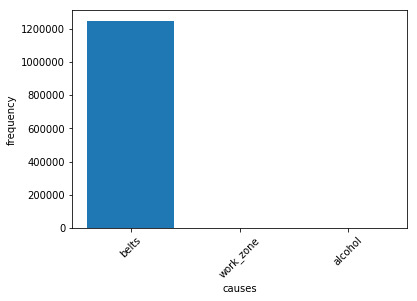

In [15]:
_.bar()

## Plot consequence

In [50]:
%%sql
SELECT * FROM consequence
LIMIT 3;

 * postgresql://student@/week12
3 rows affected.


key,contributed_to_accident,fatal,personal_injury,property_damage
1,False,False,False,False
2,False,False,False,True
3,False,False,False,True


In [51]:
%%sql
SELECT
count(nullif(contributed_to_accident = false, true)) 
FROM consequence
UNION ALL
SELECT
count(nullif(fatal = false, true)) 
FROM consequence
UNION ALL
SELECT
count(nullif(personal_injury = false, true)) 
FROM consequence
UNION ALL
SELECT
count(nullif(property_damage = false, true)) 
FROM consequence

 * postgresql://student@/week12
4 rows affected.


count
30901
279
15016
24864


In [52]:
%%sql
DROP TABLE IF EXISTS conseq;
CREATE TABLE conseq (    
    frequency  INTEGER NOT NULL,
    consequences VARCHAR NOT NULL
);

 * postgresql://student@/week12
Done.
Done.


[]

In [53]:
%%sql
INSERT INTO conseq (frequency, consequences)
VALUES (30901, 'contributed_to_accident'),
(15016, 'personal_injury'),
(24864, 'property_damage'),
(279, 'fatal');

 * postgresql://student@/week12
4 rows affected.


[]

In [54]:
%%sql
SELECT * FROM
conseq

 * postgresql://student@/week12
4 rows affected.


frequency,consequences
30901,contributed_to_accident
15016,personal_injury
24864,property_damage
279,fatal


In [55]:
%matplotlib inline

<BarContainer object of 4 artists>

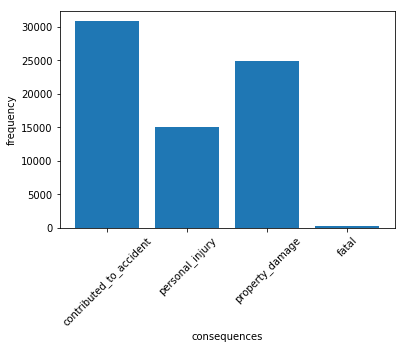

In [56]:
_.bar()

#### Secondly, we will look at the relationship between time and violations to get more sense of the data and distributions of violations 

find the number of violations by hour of the day

In [60]:
%%sql
SELECT hour, COUNT(*) to_num_vio
FROM hour
GROUP BY hour
ORDER BY to_num_vio;

 * postgresql://student@/week12
24 rows affected.


hour,to_num_vio
5,11738
4,17648
6,19041
3,29166
2,44040
15,45397
7,45561
19,45628
12,50070
20,50471


In [61]:
%matplotlib inline

<BarContainer object of 24 artists>

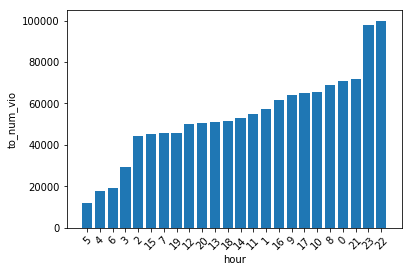

In [62]:
_.bar()

#### By displaying the count of violations from the lowest to the highest, we can see that during a day, 21 pm to 0 am is the peak hour for violations.

#### We then checked in 2016, how the number of violations distributes in 12 months of 2016

In [63]:
%%sql
SELECT year, month_of_year, count(*) as total_num_vio
FROM date
where year = 2016
group by year, month_of_year
order by total_num_vio;

 * postgresql://student@/week12
12 rows affected.


year,month_of_year,total_num_vio
2016,9,16356
2016,11,16387
2016,12,16400
2016,1,16671
2016,10,16781
2016,7,17239
2016,8,17684
2016,5,18734
2016,2,19829
2016,6,20055


In [64]:
%matplotlib inline

<BarContainer object of 12 artists>

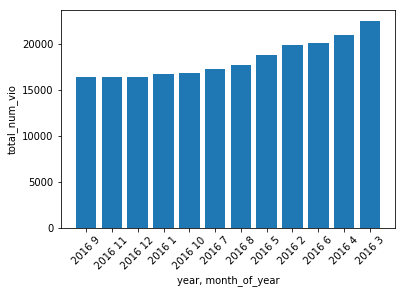

In [65]:
_.bar()

#### We can see that March, April, June and February happen the most violations in 2016

find the number of violations by month of the years among 2012 to 2018

In [66]:
%%sql
SELECT month_of_year, COUNT(*) count
FROM date
GROUP BY month_of_year
ORDER BY month_of_year;

 * postgresql://student@/week12
12 rows affected.


month_of_year,count
1,107606
2,112771
3,129040
4,125821
5,114277
6,98767
7,99546
8,101669
9,101956
10,103937


In [76]:
%matplotlib inline

<BarContainer object of 12 artists>

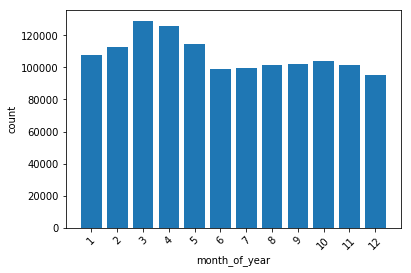

In [77]:
_.bar()

#### We checked among 2012 to 2018, in 7 years, Februray to May are the most months that violations happen

In [67]:
%%sql
DELETE FROM location
where latitude is NULL

 * postgresql://student@/week12
95354 rows affected.


[]

In [68]:
%%sql
SELECT latitude, longitude
from location
order by latitude
limit 10

 * postgresql://student@/week12
10 rows affected.


latitude,longitude
-94.6109883333333,38.8702933333333
-94.6109883333333,38.8702933333333
-94.6109883333333,38.8702933333333
-94.6109883333333,38.8702933333333
-94.6109883333333,38.8702933333333
-94.6109883333333,38.8702933333333
-94.6109883333333,38.8702933333333
-94.6109883333333,38.8702933333333
-94.6109883333333,38.8702933333333
-94.6109883333333,38.8702933333333


In [69]:
%%sql
drop table if exists hospital;

CREATE TABLE hospital AS 
SELECT personal_injury, fatal, latitude, longitude, hour, count(*) count
FROM consequence
join hour
on hour.key = consequence.key
join location
on location.key = consequence.key
WHERE personal_injury = 'True' or fatal = 'True'
group by hour,personal_injury, longitude, latitude, fatal
order by latitude desc;

 * postgresql://student@/week12
Done.
13431 rows affected.


[]

In [70]:
%%sql
select * from hospital
limit 5

 * postgresql://student@/week12
5 rows affected.


personal_injury,fatal,latitude,longitude,hour,count
True,False,39.7013583333333,-77.3172066666667,17,1
True,False,39.51379075,-77.5683131666667,11,1
True,False,39.51379075,-77.5683131666667,21,1
True,False,39.4126766666667,-76.6104133333333,2,1
True,False,39.340265,-77.26091,14,1


In [71]:
%%sql

drop table if exists hospital_2;

CREATE TABLE hospital_2 AS 
select personal_injury, fatal, hour, count(*)
from hospital
group by personal_injury, fatal, hour
order by hour;

 * postgresql://student@/week12
Done.
48 rows affected.


[]

In [74]:
%%sql
select * from hospital_2
limit 10;

 * postgresql://student@/week12
10 rows affected.


personal_injury,fatal,hour,count
True,False,0,768
False,True,0,15
True,False,1,670
False,True,1,11
False,True,2,9
True,False,2,503
False,True,3,3
True,False,3,397
True,False,4,206
False,True,4,4


#### We take look at the count of personal_injury or fatal in each hour at this time. After we got the initial exploration, we have a basic idea and expectation of our dataset, and then we can do the business question.

## Question 1 
### (1) If an investor wants to establish a hospital in the area we are researching, where would be an ideal location?
### (2) If department of transportation wants to decrease personal injury and number of violations in this area, which streets are the obvious ones the government should pay attention to and what actions could  the department take?

#### First, We find the top 10 geolocations and locations of all these violations

In [75]:
%%sql
SELECT * FROM location
LIMIT 3;

 * postgresql://student@/week12
3 rows affected.


key,geolocation,latitude,longitude,location
1,"(39.2348434333333, -77.28153995)",39.2348434333333,-77.28153995,GATEWAY CENTER DR @ CLARKSBURG RD
2,"(38.9827307333333, -77.1007551666667)",38.9827307333333,-77.1007551666667,CLARENDON RD @ ELM ST. N/
3,"(39.06914295, -76.9696780666667)",39.06914295,-76.9696780666667,2068 HARLEQUIN TERRACE


In [76]:
%%sql
SELECT geolocation, count(geolocation)
FROM location
GROUP BY geolocation
ORDER BY count DESC
LIMIT 10;

 * postgresql://student@/week12
10 rows affected.


geolocation,count
"(39.045425, -76.9907366666667)",551
"(39.0462766666667, -76.990695)",431
"(39.109775, -76.91044)",327
"(39.0056183333333, -77.0123283333333)",268
"(39.11061, -76.9897983333333)",253
"(39.057555, -76.9678266666667)",210
"(39.0039, -77.036485)",155
"(39.1492783333333, -77.06662)",128
"(39.077695, -77.046385)",128
"(38.9920483333333, -77.0271333333333)",124


In [77]:
%%sql
SELECT location, count(location)
FROM location
GROUP BY location
ORDER BY count DESC
LIMIT 10;

 * postgresql://student@/week12
10 rows affected.


location,count
IS 370 @ IS 270,1973
W/B IS 370 @ IS 270,1884
WAYNE AVE @ DALE DR,1802
RANDOLPH / COLIE,1494
WOODFIELD RD @ EMORY GROVE RD,1446
RT 28 @ BLACKBERRY DR,1428
10901 WESTLAKE DRIVE,1336
MONTGOMERY VILLAGE AVE @ RUSSELL AVE,1274
COLESVILLE RD @ GEORGIA AVE,1230
CLOPPER RD E/B @ ORCHARD HILLS DR,1200


#### Second, we get those locations and geolocations on the map and find the most proper location of the hospital

#### (1) get top 10 geolocations using Tableau

In [78]:
from IPython.display import Image

In [79]:
Image(url= "https://shengqizhou.s3.amazonaws.com/WechatIMG2.jpeg", width=1000, height=1000)

#### (2) get top 10 locations using google map

In [3]:
Image(url= "https://shengqizhou.s3.amazonaws.com/WechatIMG5.jpeg", width=1000, height=1000)

#### (3) show the combination of top 10 locations and geolocations using google map

In [4]:
Image(url= "https://shengqizhou.s3.amazonaws.com/WechatIMG8.jpeg", width=1000, height=1000)

#### Third, from the cause of the violations, we can identity the actions the department should take

In [16]:
%%sql
SELECT * FROM
pcause

 * postgresql://student@/week12
3 rows affected.


frequency,causes
1247956,belts
248,work_zone
2208,alcohol


In [17]:
%matplotlib inline

<BarContainer object of 3 artists>

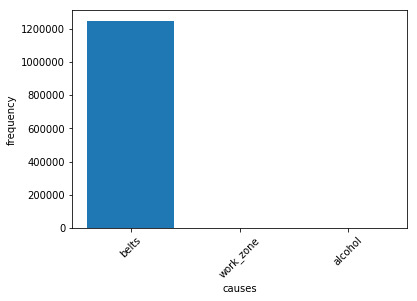

In [18]:
_.bar()

#### Finally, draw conclusion for Question 1
##### (1)Making use of “Traffic violation in Maryland County” dataset, our team aim to reduce the property damage and personal injury as well as increasing revenue through accidents. Therefore, the first thing coming to our mind is building a hospital which relatively near those high frequent traffic violation areas. To begin with, we regard columns ‘geolocation’, ‘latitude’, ‘longitude’ and ‘location’ as dimensions, and pinpoint Top 10 frequent violation geo-locations and Top 10 accident locations which happened at least thousand times of accidents during 2012-2018 in Maryland county. 

##### Then, after counting the top 10 geolocations and locations, we plot maps below based on these locations and draw several conclusions through the data: 

##### In general, traffic violation and accidents occur mostly in the following types of places:
##### 1.The margin of Maryland County with narrow road
##### 2.The intersect crossroad with narrow width 
##### 3.Downtowns with irregular road trends 
##### 4.Two adjacent blocks with similar terrible traffic conditions   

##### What’s more, based on maps and conclusions, we start to find appropriate locations to build our expected hospitals. With geoloaction map, we initially choose 2 places near clusters of accidents as ideal hospital places. Coincidentally, one of the two place (near D.C.) already has a hospital, which somehow validated our hypothesis and further strengthens our confidence about the location. The brand-new hospital is at the intersection of Good Hope Road and New Hampshire Ave. It now is a undeveloped place with trees and streams around, and the nearby has several parks, churches, hotels, inns, restaurants and residential areas, which seems an ideal place for a hospital.

##### (2) By observation, here are some streets and avenues with most accidents:
##### -Wayne Ave, Silver Spring;
##### -Russell Ave & Montgomery Village Ave, Gaithersburg; 
##### -Clopper Rd, Maryland;
##### -Georgia Ave & Colesville Rd, Silver Spring;
##### -Woodfield Rd & Emory Grove Rd, Redland;

##### What’s more, the clusters of traffic violations are congregated in two areas: Gaithersburg and Silver Spring, which happened several times more than other streets and avenues. Thus, in my opinion, our group would suggest the location government, policy traffic management department, Radio station to carry out more traffic safety activities and remind their residuals to obey the traffic rules


## Question 2 If local community and non-profit organizations such as American Red-cross want to arrange some volunteers during peak hour of traffic violations, what kind of resourses they sho  ud disstriburfte?

In [138]:
%%sql
select hour,sum(count) as total_num_injury_fatal
from hospital_2
group by hour
order by total_num_injury_fatal;

 * postgresql://student@/week12
24 rows affected.


hour,total_num_injury_fatal
3,44
4,49
1,56
2,63
5,82
0,83
23,93
22,146
20,155
21,163


In [139]:
%matplotlib inline

<BarContainer object of 24 artists>

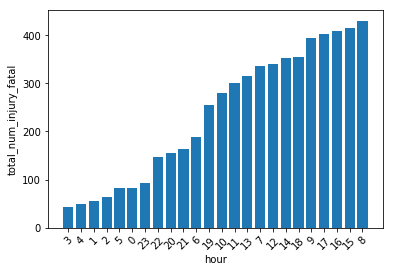

In [140]:
_.bar()

##### We counted the total number of personaly injury and fatal during 24 hours in a day. As we can see in the above chart, duing peak hours of traffic, such as 8-9 am and 15-17, there are most traffice violations. For non-profit organizations and American Red-cross, we suggest that they can Set up emergency resettlement sites during 8-9am and 15-17 and arrange care workers during the same time when people commute.

## Question 3 If companies want to purchase vehicals, what considerations should be taken into account?

In [80]:
%%sql
drop table if exists company;

CREATE TABLE company AS 
select model, personal_injury, property_damage, contributed_to_accident, count (*) total_num_factors
from vehicle
join consequence on vehicle.key = consequence.key
where personal_injury = 'True' or property_damage = 'True' or contributed_to_accident = 'True'
group by model, personal_injury, property_damage, contributed_to_accident
order by total_num_factors desc;

 * postgresql://student@/week12
Done.
6466 rows affected.


[]

In [102]:
%%sql
select model, sum(total_num_factors) as total_no_vio
from company
group by model
order  by total_no_vio desc
limit 5;

 * postgresql://student@/week12
5 rows affected.


model,total_no_vio
4S,5364
TK,3079
ACCORD,2082
CIVIC,1891
CAMRY,1814


In [103]:
%matplotlib inline

<BarContainer object of 5 artists>

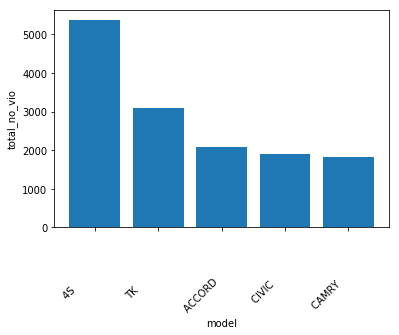

In [104]:
_.bar()

In [106]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url = "https://gwu-kellyzyy-2019.s3.amazonaws.com/WechatIMG1347.png")

In [84]:
%%sql
drop table if exists company1;

CREATE TABLE company1 AS 
select make, personal_injury, property_damage, contributed_to_accident, count (*) total_num_factors
from vehicle
join consequence on vehicle.key = consequence.key
where personal_injury = 'True' or property_damage = 'True' or contributed_to_accident = 'True'
group by make, personal_injury, property_damage, contributed_to_accident
order by total_num_factors desc;

 * postgresql://student@/week12
Done.
1474 rows affected.


[]

In [85]:
%%sql
DROP TABLE IF EXISTS company2;

CREATE TABLE company2 AS 
select make, sum(total_num_factors) total_number
from company1
group by make
order  by total_number desc;

 * postgresql://student@/week12
Done.
693 rows affected.


[]

In [86]:
%%sql
DROP TABLE IF EXISTS company3;

CREATE TABLE company3 AS 
select make, total_number,
CASE
    WHEN make LIKE 'TOY%' THEN
         'TOYOTA'
    WHEN make LIKE 'HON%' THEN
         'HONDA'
    WHEN make LIKE 'CHEV%' THEN
         'CHEVY'
    WHEN make LIKE 'NISS%' THEN 
    'NISSAN'
    WHEN make LIKE 'YAMA%' THEN 
    'YAMAHA'
    WHEN make LIKE 'VOLK%' THEN 
    'VOLKSWAGON'
    WHEN make LIKE 'FOR%' THEN 
    'FORD'
    WHEN make LIKE 'DOD%' THEN 
    'DODGE'
    WHEN make LIKE 'BMW%' THEN 
    'BMW'
    WHEN make LIKE 'JEEP%' THEN 
    'JEEP'
    ELSE
        'UNKOWN' END as new
from company2;

 * postgresql://student@/week12
Done.
693 rows affected.


[]

In [97]:
%%sql
drop table if exists company4;
create table company4 as

select new as new_make, sum(total_number) as total_number_violations
from company3
group by new
order by total_number_violations desc;

 * postgresql://student@/week12
Done.
11 rows affected.


[]

In [98]:
%%sql
delete from company4
where new_make = 'UNKOWN'

 * postgresql://student@/week12
1 rows affected.


[]

In [99]:
%%sql
select * from company4

 * postgresql://student@/week12
10 rows affected.


new_make,total_number_violations
TOYOTA,8884
HONDA,7742
FORD,5030
CHEVY,4131
NISSAN,4002
DODGE,1903
BMW,1485
JEEP,1164
VOLKSWAGON,1011
YAMAHA,48


In [100]:
%matplotlib inline

<BarContainer object of 10 artists>

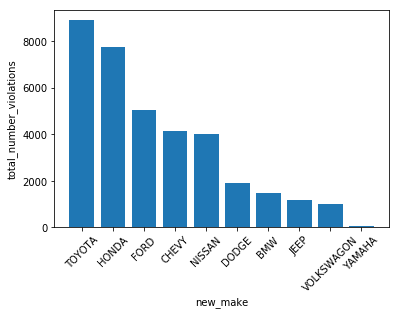

In [101]:
_.bar()

In [105]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url = "https://gwu-kellyzyy-2019.s3.amazonaws.com/WechatIMG1345.png")

##### We joined two tables of vehicle and consequence to see corelations between vehicle chracteristics and violations, specifically personal_injury, property_damage and fatal. We are trying to understand what kind of model and manufaturers contribute the most in these three aspects. As we can see in the chart, we found top 5 models and top 5 manufacturers that appears the most in personal injury/property damage/fatal. We hope these findings could help companies in cosidering buying vehicles for their commercial use. We suggest that companies could consider more insurance plans when buying these vehicles.